# Imbalanced data lab | Leonardo Olmos Saucedo

## Import required libraries

In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

## Get dataset

1. Load the dataset and explore the variables.

In [2]:
customer_df = pd.read_csv('./files_for_lab/customer_churn.csv')

In [3]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Drop useless columns

2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`, `MonthlyCharges`.

In [5]:
cols = ['Churn', 'tenure', 'SeniorCitizen', 'MonthlyCharges']

In [6]:
cols_to_drop = [col for col in customer_df.columns if col not in cols]

In [7]:
cols_to_drop

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [8]:
customer_df = customer_df.drop(columns = cols_to_drop)

In [9]:
customer_df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [10]:
customer_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes


In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [12]:
def boolean_churn(element):
    if element.lower() == 'yes':
        return 1
    elif element.lower() == 'no':
        return 0
    else:
        return element

In [13]:
customer_df['Churn'] = customer_df['Churn'].apply(lambda x: boolean_churn(x))

In [14]:
customer_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   Churn           7043 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 220.2 KB


In [16]:
customer_df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Split into X / y

3. Extract the target variable.

In [17]:
y = customer_df['Churn']

In [18]:
X = customer_df.drop(columns=['Churn'])

In [19]:
X.shape

(7043, 3)

In [20]:
y.shape

(7043,)

<Axes: xlabel='Churn', ylabel='count'>

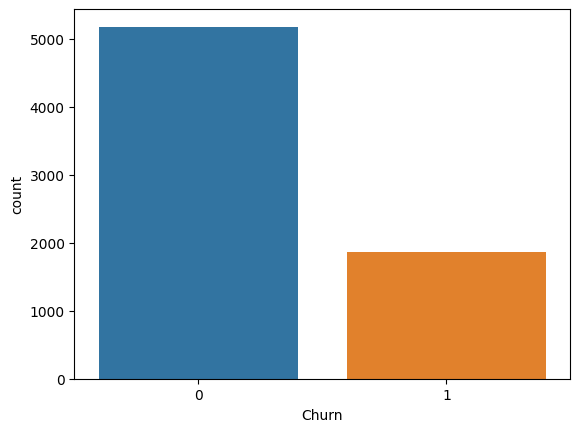

In [21]:
sns.countplot(x= customer_df['Churn'], data = customer_df)

In [22]:
customer_df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

5. Extract the independent variables and scale them.

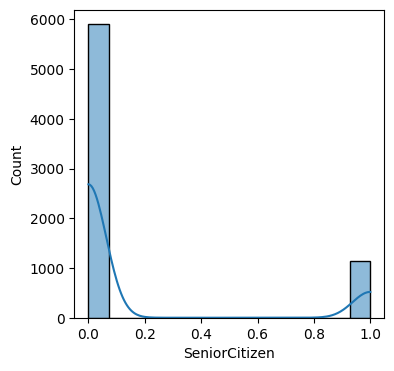

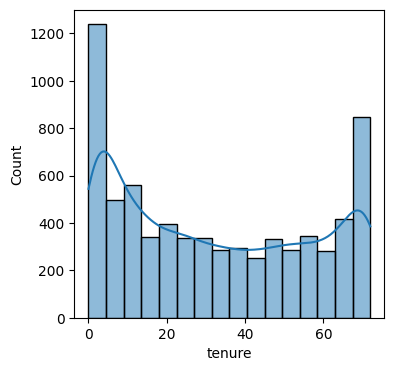

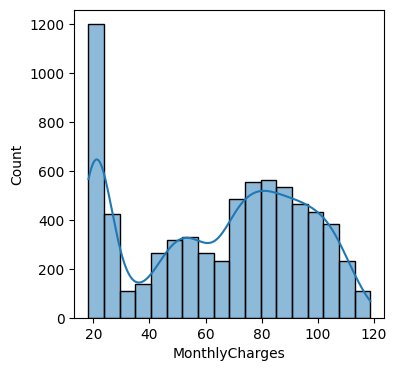

In [23]:
for column in X.columns:
    plt.figure(figsize = (4, 4))
    sns.histplot(customer_df[column], kde=True)
    plt.show()

## Split into train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using standard scaler

In [25]:
# Using standard scaler into train data
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)

X_train_standard_scaler = pd.DataFrame(X_train_standard, columns=X_train.columns, index=X_train.index)
X_train_standard_scaler

,SeniorCitizen,tenure,MonthlyCharges
2142,-0.437749,-0.465683,-0.000474
1623,-0.437749,0.885537,1.074754
6074,-0.437749,-1.284605,-1.376499
1362,-0.437749,-1.161766,0.177346
6754,-0.437749,-1.325551,-0.098524
...,...,...,...
3772,-0.437749,-1.284605,1.001632
5191,-0.437749,-0.383791,0.872006
5226,-0.437749,-0.834198,-1.452945
5390,2.284413,-0.834198,1.149538


In [26]:
# Using standard scaler into test data
X_test_standard = standard_scaler.transform(X_test)
X_test_standard_scaler = pd.DataFrame(X_test_standard, columns= X_train.columns, index=X_test.index)
X_test_standard_scaler

,SeniorCitizen,tenure,MonthlyCharges
185,-0.437749,-1.284605,-1.331629
2715,-0.437749,0.353238,-1.316672
3825,-0.437749,0.803645,-1.512772
1807,-0.437749,-1.284605,0.381756
132,-0.437749,1.417836,-0.475768
...,...,...,...
6366,-0.437749,1.294997,0.114195
315,-0.437749,0.762699,1.501854
2439,-0.437749,-0.629468,-1.494492
5002,-0.437749,1.499728,-0.695134


### Using min max scaler

In [27]:
# Using min max scaler into train data
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)

X_train_minmax_scaler = pd.DataFrame(X_train_minmax, columns=X_train.columns, index=X_train.index)
X_train_minmax_scaler

,SeniorCitizen,tenure,MonthlyCharges
2142,0.0,0.291667,0.464375
1623,0.0,0.750000,0.786746
6074,0.0,0.013889,0.051819
1362,0.0,0.055556,0.517688
6754,0.0,0.000000,0.434978
...,...,...,...
3772,0.0,0.013889,0.764823
5191,0.0,0.319444,0.725959
5226,0.0,0.166667,0.028899
5390,1.0,0.166667,0.809168


In [28]:
# Using min max scaler into test data
X_test_minmax = minmax_scaler.transform(X_test)
X_test_minmax_scaler = pd.DataFrame(X_test_minmax, columns= X_train.columns, index=X_test.index)
X_test_minmax_scaler

,SeniorCitizen,tenure,MonthlyCharges
185,0.0,0.013889,0.065272
2715,0.0,0.569444,0.069756
3825,0.0,0.722222,0.010962
1807,0.0,0.013889,0.578974
132,0.0,0.930556,0.321873
...,...,...,...
6366,0.0,0.888889,0.498754
315,0.0,0.708333,0.914798
2439,0.0,0.236111,0.016442
5002,0.0,0.958333,0.256104


### Using robust scaler

In [29]:
# Using robust scaler into train data
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_robust = robust_scaler.transform(X_train)

X_train_robust_scaler = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_train_robust_scaler

,SeniorCitizen,tenure,MonthlyCharges
2142,0.0,-0.173913,-0.104729
1623,0.0,0.543478,0.492272
6074,0.0,-0.608696,-0.868743
1362,0.0,-0.543478,-0.005998
6754,0.0,-0.630435,-0.159170
...,...,...,...
3772,0.0,-0.608696,0.451672
5191,0.0,-0.130435,0.379700
5226,0.0,-0.369565,-0.911188
5390,1.0,-0.369565,0.533795


In [30]:
# Using robust scaler into test data
X_test_robust = robust_scaler.transform(X_test)
X_test_robust_scaler = pd.DataFrame(X_test_robust, columns= X_train.columns, index=X_test.index)
X_test_robust_scaler

,SeniorCitizen,tenure,MonthlyCharges
185,0.0,-0.608696,-0.843829
2715,0.0,0.260870,-0.835525
3825,0.0,0.500000,-0.944406
1807,0.0,-0.608696,0.107497
132,0.0,0.826087,-0.368627
...,...,...,...
6366,0.0,0.760870,-0.041061
315,0.0,0.478261,0.729412
2439,0.0,-0.260870,-0.934256
5002,0.0,0.869565,-0.490427


## Create model

5. Build the logistic regression model.

In [31]:
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs')

### Model without scaler

In [32]:
# Data without scaler
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
predictions_train = logistic_reg.predict(X_train)
predictions_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
predictions_test = logistic_reg.predict(X_test)
predictions_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(logistic_reg.score(X_train, y_train)))
print("The accuracy of the model in the TEST set is: {:.2f}".format(logistic_reg.score(X_test, y_test)))

The accuracy of the model in the TRAIN set is: 0.79
The accuracy of the model in the TEST set is: 0.81


### Model using standard scaler

In [36]:
# Data with standard scaler
logistic_reg.fit(X_train_standard_scaler, y_train)

LogisticRegression(random_state=0)

In [37]:
standard_predictions_train = logistic_reg.predict(X_train_standard_scaler)
standard_predictions_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
standard_predictions_test = logistic_reg.predict(X_test_standard_scaler)
standard_predictions_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(logistic_reg.score(X_train_standard_scaler, y_train)))
print("The accuracy of the model in the TEST set is: {:.2f}".format(logistic_reg.score(X_test_standard_scaler, y_test)))

The accuracy of the model in the TRAIN set is: 0.79
The accuracy of the model in the TEST set is: 0.81


### Model using min max scaler

In [40]:
# Data with min max scaler
logistic_reg.fit(X_train_minmax_scaler, y_train)

LogisticRegression(random_state=0)

In [41]:
minmax_predictions_train = logistic_reg.predict(X_train_minmax_scaler)
minmax_predictions_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
minmax_predictions_test = logistic_reg.predict(X_test_minmax_scaler)
minmax_predictions_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(logistic_reg.score(X_train_minmax_scaler, y_train)))
print("The accuracy of the model in the TEST set is: {:.2f}".format(logistic_reg.score(X_test_minmax_scaler, y_test)))

The accuracy of the model in the TRAIN set is: 0.79
The accuracy of the model in the TEST set is: 0.80


### Model using robust scaler

In [44]:
# Data with robust scaler
logistic_reg.fit(X_train_robust_scaler, y_train)

LogisticRegression(random_state=0)

In [45]:
robust_predictions_train = logistic_reg.predict(X_train_robust_scaler)
robust_predictions_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [46]:
robust_predictions_test = logistic_reg.predict(X_test_robust_scaler)
robust_predictions_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(logistic_reg.score(X_train_robust_scaler, y_train)))
print("The accuracy of the model in the TEST set is: {:.2f}".format(logistic_reg.score(X_test_robust_scaler, y_test)))

The accuracy of the model in the TRAIN set is: 0.79
The accuracy of the model in the TEST set is: 0.81


## Evaluate model

In [48]:
y_pred_test = logistic_reg.predict(X_test)
y_pred_scaler_test = logistic_reg.predict(X_test_standard_scaler)
y_pred_minmax_test = logistic_reg.predict(X_test_minmax_scaler)
y_pred_robust_test = logistic_reg.predict(X_test_robust_scaler)

In [54]:
def get_metrics(y_test, y_predictions):
    print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_predictions)))
    print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_predictions)))
    print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_predictions)))
    print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_predictions)))
    print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_predictions)))

In [60]:
def plot_confusion_matrix(y_test, y_predictions_test):
    cm_test = confusion_matrix(y_test,y_predictions_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_reg.classes_)
    disp.plot()
    plt.show()

### Metrics model without scaler

In [55]:
get_metrics(y_test, y_pred_test)

The accuracy in the TEST set is: 0.57
The precision in the TEST set is: 0.38
The recall in the TEST set is: 0.96
The F1 in the TEST set is: 0.54
The Kappa in the TEST set is: 0.26


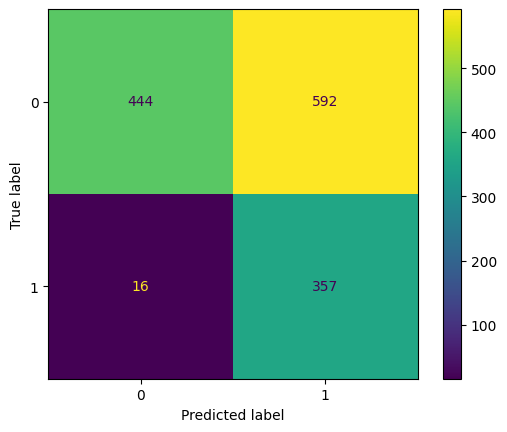

In [61]:
plot_confusion_matrix(y_test, y_pred_test)

### Metrics model with standard scaler

In [56]:
get_metrics(y_test, y_pred_scaler_test)

The accuracy in the TEST set is: 0.76
The precision in the TEST set is: 0.54
The recall in the TEST set is: 0.73
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.46


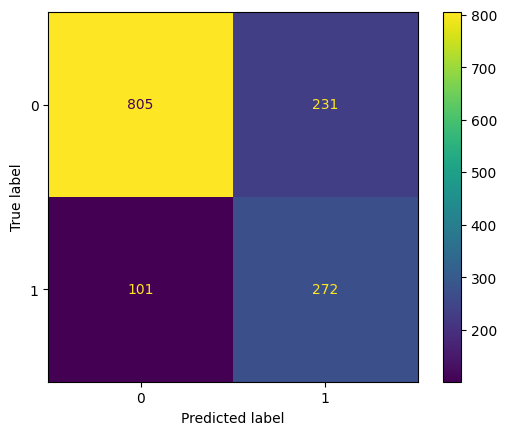

In [62]:
plot_confusion_matrix(y_test, y_pred_scaler_test)

### Metrics model with min max scaler

In [57]:
get_metrics(y_test, y_pred_minmax_test)

The accuracy in the TEST set is: 0.76
The precision in the TEST set is: 0.77
The recall in the TEST set is: 0.14
The F1 in the TEST set is: 0.24
The Kappa in the TEST set is: 0.17


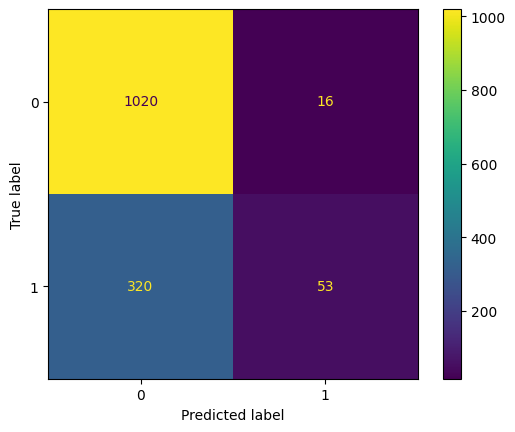

In [63]:
plot_confusion_matrix(y_test, y_pred_minmax_test)

### Metrics model with robust scaler

In [58]:
get_metrics(y_test, y_pred_robust_test)

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.69
The recall in the TEST set is: 0.47
The F1 in the TEST set is: 0.56
The Kappa in the TEST set is: 0.44


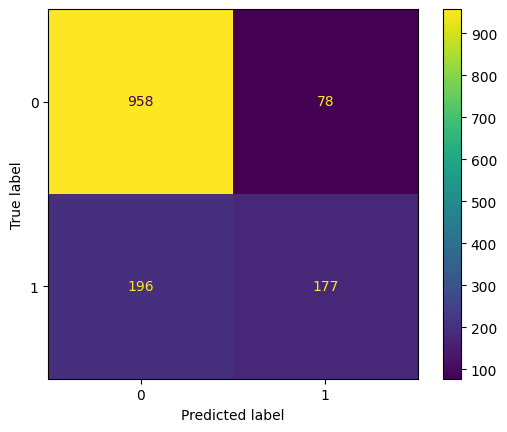

In [64]:
plot_confusion_matrix(y_test, y_pred_robust_test)

## Balancing data

### Using oversampling on data without scaler

In [67]:
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train,y_train)

In [69]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_over, y_train_over)
y_pred_test = logistic_reg.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.77
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.43


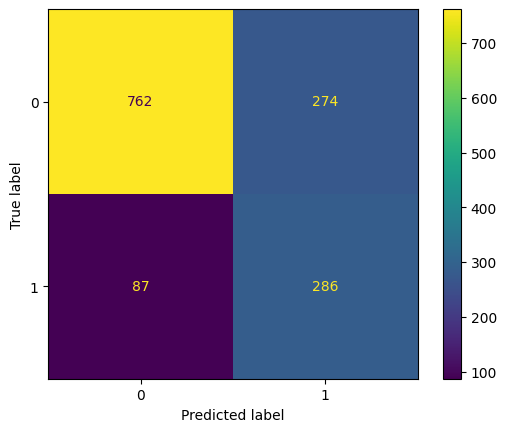

In [71]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

### Using undersampling on data without scaler

In [72]:
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [73]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_under, y_train_under)
y_pred_under_test = logistic_reg.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_under_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_under_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_under_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_under_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_under_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.43


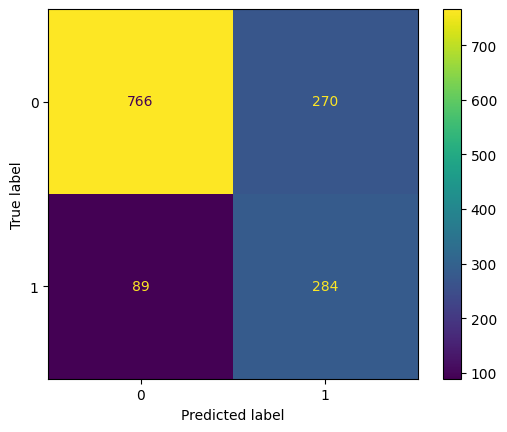

In [74]:
cm_test = confusion_matrix(y_test,y_pred_under_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

### Using oversampling SMOTE on data without scaler

In [75]:
sm = SMOTE(random_state=100, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [76]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_smote_test = logistic_reg.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_smote_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_smote_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_smote_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_smote_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_smote_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.52
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.44


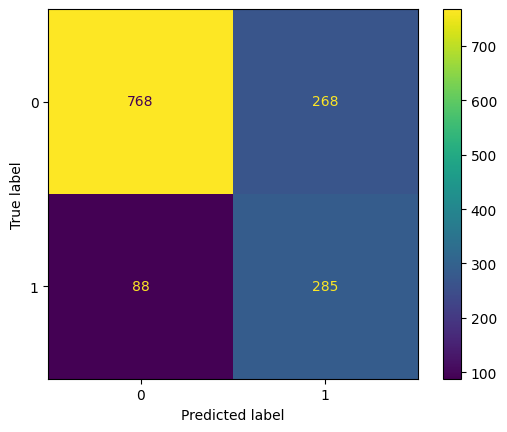

In [77]:
cm_test = confusion_matrix(y_test,y_pred_smote_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()

### Using undersampling tomek links on data without scaler

In [78]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [79]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_tl, y_train_tl)
y_pred_tomek_test = logistic_reg.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_tomek_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_tomek_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_tomek_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_tomek_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_tomek_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.63
The recall in the TEST set is: 0.55
The F1 in the TEST set is: 0.59
The Kappa in the TEST set is: 0.45


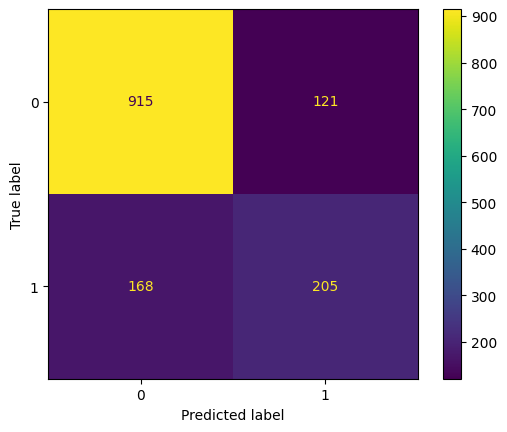

In [80]:
cm_test = confusion_matrix(y_test,y_pred_tomek_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logistic_reg.classes_)
disp.plot()
plt.show()